In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path
from sklearn.linear_model import LinearRegression
import datetime as dt
from datetime import datetime
from pandas import DataFrame
import pandas as pd
import numpy as np
import os
# Find the latest version of spark 3.0  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.0.3'
spark_version = 'spark-3.0.3'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop2.7.tgz
!tar xf $SPARK_VERSION-bin-hadoop2.7.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop2.7"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net/graph

In [ ]:
vine_table_df = pd.read_csv('/content/vine_table.csv')


In [ ]:
vine_table_df.head()


,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase
0,R1QX6706ZWJ1P5,5,0,0,N,Y
1,R3QWMLJHIW6P37,5,0,0,N,Y
2,R14Z1VR1N0Z9G6,5,1,1,N,Y
3,R25ZRJL0GH0U0,2,0,0,N,Y
4,R3837KYH7AZNIY,4,0,1,N,Y


In [ ]:
vine_table_df["ratio_helpful_total_votes"] = (
   vine_table_df["helpful_votes"] / vine_table_df["total_votes"]
)
vine_table_df

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
0,R1QX6706ZWJ1P5,5,0,0,N,Y,NaN
1,R3QWMLJHIW6P37,5,0,0,N,Y,NaN
2,R14Z1VR1N0Z9G6,5,1,1,N,Y,1.000000
3,R25ZRJL0GH0U0,2,0,0,N,Y,NaN
4,R3837KYH7AZNIY,4,0,1,N,Y,0.000000
...,...,...,...,...,...,...,...
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765
85979,R1O8C9XEYHQUIH,2,38,41,N,N,0.926829


In [ ]:
vine_table_df.count()

review_id                    85981
star_rating                  85981
helpful_votes                85981
total_votes                  85981
vine                         85981
verified_purchase            85981
ratio_helpful_total_votes    46097
dtype: int64

In [ ]:
New_vine_table = vine_table_df.dropna()
New_vine_table

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
2,R14Z1VR1N0Z9G6,5,1,1,N,Y,1.000000
4,R3837KYH7AZNIY,4,0,1,N,Y,0.000000
12,RN37YYZBP9BMP,5,4,4,N,Y,1.000000
19,RNFW9SWC5D0YF,5,2,2,N,N,1.000000
21,R24V6VDHS7JMQV,5,1,1,N,Y,1.000000
...,...,...,...,...,...,...,...
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765
85979,R1O8C9XEYHQUIH,2,38,41,N,N,0.926829


In [ ]:
New_vine_table.count()

review_id                    46097
star_rating                  46097
helpful_votes                46097
total_votes                  46097
vine                         46097
verified_purchase            46097
ratio_helpful_total_votes    46097
dtype: int64

In [ ]:
New_vine_table_votes_over_20 = vine_table_df[(vine_table_df["total_votes"] >= 20)]
New_vine_table_votes_over_20                       

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
884,R2PT2X8FMYFCV3,5,39,41,N,Y,0.951220
917,RGCUQSH80SYY7,1,36,47,N,N,0.765957
939,R3E6EI073KP0AL,2,21,36,N,Y,0.583333
947,R3MYTXW7B4Z6YW,4,687,711,N,Y,0.966245
1211,R2WMF1IWN5ZYO4,5,18,24,N,Y,0.750000
...,...,...,...,...,...,...,...
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765
85979,R1O8C9XEYHQUIH,2,38,41,N,N,0.926829


In [ ]:
Vote_ratio_over_50 = New_vine_table_votes_over_20[(New_vine_table_votes_over_20["ratio_helpful_total_votes"] >= 0.5)]
Vote_ratio_over_50

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
884,R2PT2X8FMYFCV3,5,39,41,N,Y,0.951220
917,RGCUQSH80SYY7,1,36,47,N,N,0.765957
939,R3E6EI073KP0AL,2,21,36,N,Y,0.583333
947,R3MYTXW7B4Z6YW,4,687,711,N,Y,0.966245
1211,R2WMF1IWN5ZYO4,5,18,24,N,Y,0.750000
...,...,...,...,...,...,...,...
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765
85979,R1O8C9XEYHQUIH,2,38,41,N,N,0.926829


In [ ]:
Vote_ratio_over_50.dtypes

review_id                     object
star_rating                    int64
helpful_votes                  int64
total_votes                    int64
vine                          object
verified_purchase             object
ratio_helpful_total_votes    float64
dtype: object

In [ ]:
Vote_ratio_over_50.groupby("vine")["vine"].count()

vine
N    3094
Y       3
Name: vine, dtype: int64

In [ ]:
Vote_ratio_over_50["vine"].value_counts()

N    3094
Y       3
Name: vine, dtype: int64

In [ ]:
Vote_ratio_over_50.value_counts()

review_id       star_rating  helpful_votes  total_votes  vine  verified_purchase  ratio_helpful_total_votes
RZXZEC7KALGBC   2            31             33           N     N                  0.939394                     1
R293VYEYAGPQ28  3            125            159          N     N                  0.786164                     1
R27WOH64I9SZU0  3            42             56           N     Y                  0.750000                     1
R27W8CBHM43YKR  4            44             45           N     Y                  0.977778                     1
R27T7CUISH3S8D  4            31             33           N     Y                  0.939394                     1
                                                                                                              ..
R3HNLUKAQCH8I2  1            56             57           N     N                  0.982456                     1
R3HMUYQEY3J0R0  1            29             29           N     N                  1.000000           

In [ ]:
Vine_program_paid = Vote_ratio_over_50[(Vote_ratio_over_50 ["vine"] == "Y")] 
Vine_program_paid

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
32351,R3R2RHQWEKX5NL,5,81,89,Y,N,0.910112
32362,R1RZ4JZO8DAP7H,3,200,227,Y,N,0.881057
32557,RQ94HI0WM8KIG,5,174,188,Y,N,0.925532


In [ ]:
Vine_program_paid["review_id"].count()

3

In [ ]:
Vine_program_unpaid = Vote_ratio_over_50 [(Vote_ratio_over_50 ["vine"] == "N")]
Vine_program_unpaid 

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
884,R2PT2X8FMYFCV3,5,39,41,N,Y,0.951220
917,RGCUQSH80SYY7,1,36,47,N,N,0.765957
939,R3E6EI073KP0AL,2,21,36,N,Y,0.583333
947,R3MYTXW7B4Z6YW,4,687,711,N,Y,0.966245
1211,R2WMF1IWN5ZYO4,5,18,24,N,Y,0.750000
...,...,...,...,...,...,...,...
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765
85979,R1O8C9XEYHQUIH,2,38,41,N,N,0.926829


In [ ]:
Vine_program_unpaid["review_id"].count()

3094

In [ ]:
Total_number_of_reviews = New_vine_table_votes_over_20["vine"].count()  
Total_number_of_reviews

3414

In [ ]:
number_of_5star_reviews = Vote_ratio_over_50[(Vote_ratio_over_50["star_rating"] == 5)] 
number_of_5star_reviews

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
884,R2PT2X8FMYFCV3,5,39,41,N,Y,0.951220
1211,R2WMF1IWN5ZYO4,5,18,24,N,Y,0.750000
1401,ROX6L7VJFS2P7,5,339,371,N,N,0.913747
1528,R2QBKTWBDPL8BF,5,65,83,N,N,0.783133
1690,R3ULT9I0U79N8L,5,49,57,N,N,0.859649
...,...,...,...,...,...,...,...
85970,R5U7TLT55KEV,5,18,35,N,N,0.514286
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765


In [ ]:
Five_star_reviews_Vine_program_paid = Vote_ratio_over_50[(Vote_ratio_over_50 ["vine"] == "Y")&(Vote_ratio_over_50 ["star_rating"]==5)] 
Five_star_reviews_Vine_program_paid

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
32351,R3R2RHQWEKX5NL,5,81,89,Y,N,0.910112
32557,RQ94HI0WM8KIG,5,174,188,Y,N,0.925532


In [ ]:
Five_star_reviews_Vine_program_paid["review_id"].count()

2

In [ ]:
Percentage_of_Five_star_reviews_Vine_program_paid = Five_star_reviews_Vine_program_paid["review_id"].count()/Vine_program_paid["review_id"].count()*100
Percentage_of_Five_star_reviews_Vine_program_paid

66.66666666666666

In [ ]:
Five_star_reviews_Vine_program_unpaid = Vote_ratio_over_50[(Vote_ratio_over_50 ["vine"] == "N")&(Vote_ratio_over_50 ["star_rating"]==5)] 
Five_star_reviews_Vine_program_unpaid

,review_id,star_rating,helpful_votes,total_votes,vine,verified_purchase,ratio_helpful_total_votes
884,R2PT2X8FMYFCV3,5,39,41,N,Y,0.951220
1211,R2WMF1IWN5ZYO4,5,18,24,N,Y,0.750000
1401,ROX6L7VJFS2P7,5,339,371,N,N,0.913747
1528,R2QBKTWBDPL8BF,5,65,83,N,N,0.783133
1690,R3ULT9I0U79N8L,5,49,57,N,N,0.859649
...,...,...,...,...,...,...,...
85970,R5U7TLT55KEV,5,18,35,N,N,0.514286
85976,R1NUYN39WEVD9X,5,96,98,N,N,0.979592
85977,RD17SQQ58L34O,5,46,48,N,N,0.958333
85978,R30DX2RCMIKQ90,5,31,34,N,N,0.911765


In [ ]:
Five_star_reviews_Vine_program_unpaid["review_id"].count()

1704

In [ ]:
Percentage_of_Five_star_reviews_Vine_program_unpaid = Five_star_reviews_Vine_program_unpaid["review_id"].count()/Vine_program_unpaid["review_id"].count()*100
Percentage_of_Five_star_reviews_Vine_program_unpaid

55.07433742727861

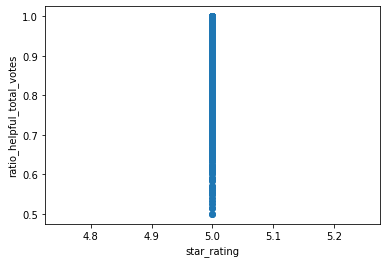

In [ ]:
plt.scatter(Five_star_reviews_Vine_program_unpaid.star_rating, Five_star_reviews_Vine_program_unpaid.ratio_helpful_total_votes)
plt.xlabel('star_rating')
plt.ylabel('ratio_helpful_total_votes')
plt.show()

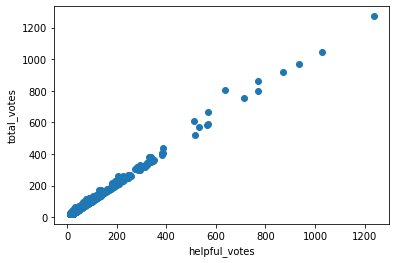

In [ ]:
plt.scatter(Five_star_reviews_Vine_program_unpaid.helpful_votes	, Five_star_reviews_Vine_program_unpaid.total_votes)
plt.xlabel('helpful_votes')
plt.ylabel('total_votes')
plt.show()

In [ ]:
X = Five_star_reviews_Vine_program_unpaid.helpful_votes.values.reshape(-1, 1)

In [ ]:
X[:5]

array([[ 39],
       [ 18],
       [339],
       [ 65],
       [ 49]])

In [ ]:
X.shape

(1704, 1)

In [ ]:
y = Five_star_reviews_Vine_program_unpaid.total_votes

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = model.predict(X)
print(y_pred.shape)

(1704,)


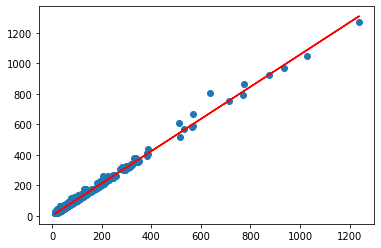

In [ ]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [ ]:
print(model.coef_)
print(model.intercept_)

[1.05694134]
1.5852043502027655


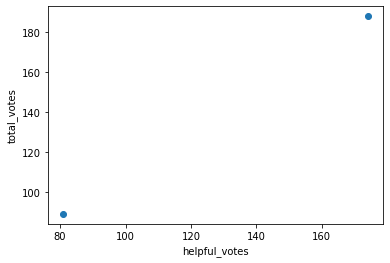

In [ ]:
plt.scatter(Five_star_reviews_Vine_program_paid.helpful_votes	, Five_star_reviews_Vine_program_paid.total_votes)
plt.xlabel('helpful_votes')
plt.ylabel('total_votes')
plt.show()